In [105]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [107]:
# reading CSV

df = pd.read_csv("IHLIDXNEWUS.csv")

df

,observation_date,IHLIDXNEWUS
0,2020-02-01,100.00
1,2020-02-02,100.35
2,2020-02-03,100.71
3,2020-02-04,100.54
4,2020-02-05,100.61
...,...,...
1934,2025-05-19,109.12
1935,2025-05-20,109.38
1936,2025-05-21,109.50
1937,2025-05-22,108.70


In [109]:
start_date = df.iloc[0]['observation_date']
print(start_date)

2020-02-01


In [111]:
#creating an empty column 

df['Day'] = 0

In [113]:
from datetime import datetime

days = []
for row in df.itertuples():
    i = (datetime.strptime(row.observation_date, "%Y-%m-%d") - datetime.strptime(start_date,"%Y-%m-%d")).days
    days.append(i)
df["Day"] = days
df

,observation_date,IHLIDXNEWUS,Day
0,2020-02-01,100.00,0
1,2020-02-02,100.35,1
2,2020-02-03,100.71,2
3,2020-02-04,100.54,3
4,2020-02-05,100.61,4
...,...,...,...
1934,2025-05-19,109.12,1934
1935,2025-05-20,109.38,1935
1936,2025-05-21,109.50,1936
1937,2025-05-22,108.70,1937


In [115]:
# spliting Target varible from df

X = df["Day"]
y = df["IHLIDXNEWUS"]

X

0          0
1          1
2          2
3          3
4          4
        ... 
1934    1934
1935    1935
1936    1936
1937    1937
1938    1938
Name: Day, Length: 1939, dtype: int64

In [117]:
y

0       100.00
1       100.35
2       100.71
3       100.54
4       100.61
         ...  
1934    109.12
1935    109.38
1936    109.50
1937    108.70
1938    108.29
Name: IHLIDXNEWUS, Length: 1939, dtype: float64

In [119]:
# Train_test_split (XXyy)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=13)


In [121]:
print(X_train.shape)
print(X_test.shape)

(1357,)
(582,)


In [123]:
print(y_train.shape)
print(y_test.shape)

(1357,)
(582,)


In [125]:
#Building Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [127]:
pred = model.predict(pd.DataFrame(X_test))
pred

array([138.09996005, 138.01519641, 129.71683611, 130.14065431,
       142.04994564, 131.89526164, 138.17624732, 145.78802214,
       142.34661838, 133.81091989, 133.40405442, 139.76132738,
       132.7513744 , 140.65982196, 143.37225842, 130.13217794,
       140.21057467, 138.85435644, 140.05800012, 130.7763816 ,
       144.72847665, 144.42332755, 136.36230544, 130.83571615,
       142.87215294, 144.1520839 , 132.92090168, 139.76980374,
       129.60664338, 133.9973999 , 130.62380705, 136.90479273,
       129.62359611, 129.63207247, 129.8609343 , 135.00608721,
       138.09148368, 141.58374563, 145.05905484, 134.58226901,
       136.37925817, 139.82913829, 131.06457798, 144.66066574,
       141.02430561, 137.47270911, 143.59264388, 131.68335254,
       136.20125452, 132.21736347, 133.52272352, 145.07600757,
       140.59201104, 130.32713431, 135.02303994, 142.03299291,
       138.74416371, 131.35277435, 130.29322886, 131.92069073,
       143.26206569, 131.99697801, 144.22837117, 142.63

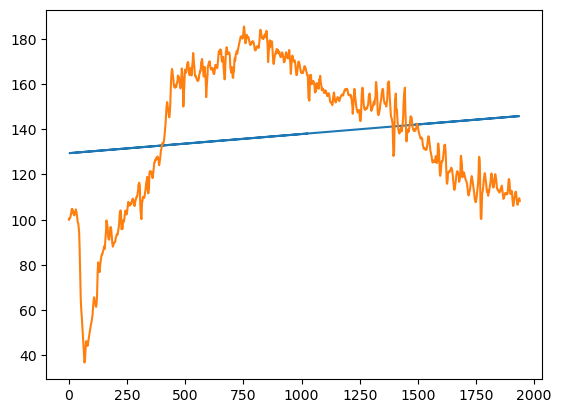

In [149]:
# visualization

plt.plot(X_test,pred)
plt.plot(X,y)
plt.show()

In [145]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,pred)
r2

0.008845999049819087

In [153]:
# Lets try Lasso

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
param = {'alpha': np.logspace(-5,5,10)}
param

{'alpha': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
        2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
        7.74263683e+03, 1.00000000e+05])}

In [159]:
lasso_gridCV = GridSearchCV(lasso,param_grid=param,cv=5,scoring="r2")

lasso_gridCV.fit(pd.DataFrame(X_train),y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])},
             scoring='r2')

In [161]:
y_pred_lasso = lasso_gridCV.predict(pd.DataFrame(X_test))
y_pred_lasso

array([138.09194048, 138.00864817, 129.85433115, 130.27079269,
       141.97336207, 131.99494348, 138.16690356, 145.64655288,
       142.26488515, 133.87734966, 133.47754658, 139.72446973,
       132.8361958 , 140.60736821, 143.27272209, 130.26246346,
       140.16591897, 138.83324203, 140.01599281, 130.895485  ,
       144.60539903, 144.30554671, 136.38444815, 130.95378962,
       142.78129746, 144.03901133, 133.00278042, 139.73279896,
       129.74605114, 134.06059274, 130.74555885, 136.91751893,
       129.76270961, 129.77103884, 129.99592807, 135.05177121,
       138.08361125, 141.51525437, 144.93023903, 134.63530967,
       136.40110661, 139.79110358, 131.17867885, 144.53876518,
       140.96552513, 137.4755774 , 143.48928209, 131.78671271,
       136.22619276, 132.31145425, 133.59415581, 144.94689749,
       140.54073436, 130.45403577, 135.06842967, 141.95670361,
       138.72496203, 131.4618727 , 130.42071884, 132.01993117,
       143.16444208, 132.09489425, 144.1139744 , 142.54

In [163]:
r2_lasso = r2_score(y_test,y_pred_lasso)
r2_lasso

0.009052755153031278

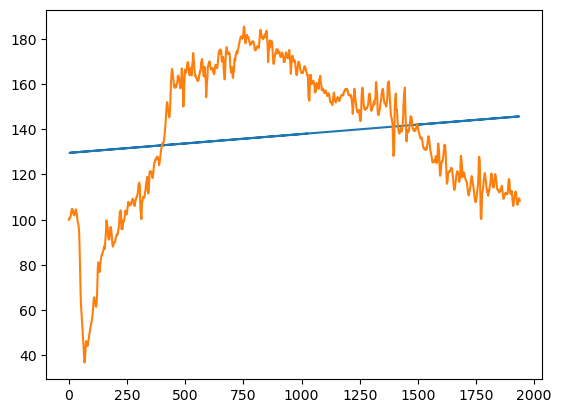

In [165]:
plt.plot(X_test,y_pred_lasso)
plt.plot(X,y)
plt.show()

In [171]:
# Let's go for Random Forest 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

model_RFR = RandomForestRegressor()

paramRF = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto','sqrt']
}

modelR = RandomizedSearchCV(model_RFR,param_distributions=paramRF,scoring="r2",n_iter=25,cv=7)

In [173]:
modelR.fit(pd.DataFrame(X_train),y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 175.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(), n_iter=25,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='r2')

In [175]:
y_pred_random = modelR.predict(pd.DataFrame(X_test))

In [177]:
r2_random = r2_score(y_test,y_pred_random)
r2_random

0.998496152113454

<function matplotlib.pyplot.show(close=None, block=None)>

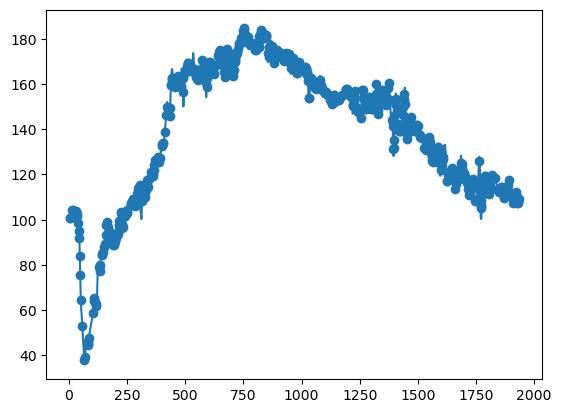

In [181]:
plt.plot(X,y)
plt.scatter(X_test,y_pred_random)
plt.show